<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [3]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [4]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv('https://raw.githubusercontent.com/DAVIDCRUZ0202/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv')


In [58]:
df = df.drop(columns='Unnamed: 0')

In [59]:
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [60]:
df.shape

(426, 2)

In [61]:
soup = BeautifulSoup(df['description'][0], 'html.parser')

In [62]:
desc_text = (soup.get_text())
print(desc_text)

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [63]:
desc_text = []
for i in df['description']:
    soup = BeautifulSoup(i, 'html.parser')
    desc_text.append(soup.get_text())

In [64]:
df['description'] = desc_text

In [65]:
df.head()

,description,title
0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


In [1]:
df.shape

NameError: name 'df' is not defined

In [66]:
type(df['description'][0])

str

## 2) Use Spacy to tokenize the listings 

In [41]:
nlp = spacy.load("en_core_web_lg")

In [67]:
text = df['description'][0]

In [68]:
print(text)

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [75]:
tokens = []
for i in df['description']:
    doc = nlp(i.strip())
    tokens.append(doc)

df['token'] = tokens
    
    

In [76]:
df.head()

,description,title,token
0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"(b""Job, Requirements:\nConceptual, understandi..."
1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"(b'Job, Description\n\nAs, a, Data, Scientist,..."
2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"(b'As, a, Data, Scientist, you, will, be, work..."
3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"(b'$4,969, -, $, 6,756, a, monthContractUnder,..."
4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"(b'Location, :, USA, \xe2\x80\x93, multiple, l..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [77]:
vect = CountVectorizer(stop_words=nlp.Defaults.stop_words, max_features=1000)

In [80]:
vect.fit(df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={"'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about',
                            'above', 'across', 'after', 'afterwards', 'again',
                            'against', 'all', 'almost', 'alone', 'along',
                            'already', 'also', 'although', 'always', 'am',
                            'among', 'amongst', 'amount', 'an', 'and',
                            'another', 'any', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [81]:
dtm = vect.transform(df['description'])

In [82]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [84]:
dtm.head(50)

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,3,0,1,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
9,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,4,0,0,1,0


In [85]:
dtm.shape

(426, 1000)

## 4) Visualize the most common word counts

In [145]:
df2 = pd.DataFrame(dtm.max().sort_values(ascending=False)[:21], columns=['count'])

In [146]:
df2 = df2.reset_index()

In [147]:
df2 = df2.rename(columns={'index': 'names'})

In [148]:
df2

,names,count
0,data,64
1,states,48
2,united,48
3,americas,47
4,xe2,29
5,x80,29
6,learning,24
7,team,21
8,analytics,20
9,business,20


In [149]:
df2.shape

(21, 2)

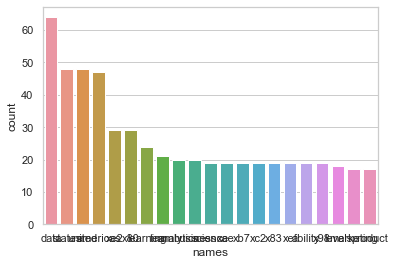

In [150]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x='names', y='count', data=df2, orient="v")

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [151]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [152]:
# import
from sklearn.feature_extraction.text import TfidfVectorizer
#instantiate
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

In [153]:
#fit and transform
dtm = tfidf.fit_transform(df['description'])

In [154]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [155]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [156]:
dtm.head()

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [158]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')

nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [159]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.28186048, 1.2923534 , 1.29554001, 1.30410844]]),
 array([[  0, 336, 276, 274, 366]], dtype=int64))

In [165]:
ideal_job = [ """
Expertise in data mining, munging, and data cleaning. Proficient in Pandas, 
XGB, and NLP. Great collaborator and team work. Leadership experience and 
ability to showcase to stakeholders.
"""]

In [166]:
new = tfidf.transform(ideal_job)

In [167]:
new

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [168]:
nn.kneighbors(new.todense())

(array([[1.31645507, 1.32810564, 1.3292636 , 1.33254217, 1.33549856]]),
 array([[201, 144, 249,  93, 326]], dtype=int64))

In [169]:
df['description'][201]

"b'InternshipOverview\\nData Science Internships\\nPortland, OR or Seattle, WA\\nThese twelve-week internships are scheduled to begin in May/June 2019\\nResponsibilities & Requirements\\nCambia Health Solutions is working to create a seamless and frictionless health care experience for consumers nationwide. This presents a unique challenge and opportunity for innovative and disruptive solutions from our Artificial Intelligence team.\\n\\nOur Data Scientists design, develop, and implement data-driven solutions using machine learning technologies and advanced statistical analyses. You should be passionate about finding insights in data, comfortable with large and fragmented data sets, and command a variety of analytic tools at your disposal.\\n\\nInternship opportunities are available on the following teams: Natural Language Processing, Deep Learning, Product Development and Clinical Analytics.\\n\\nNatural Language Processing in Seattle, WA\\nOur NLP team is looking for a passionate, ta

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 